# Marika néni elveszett - megoldás

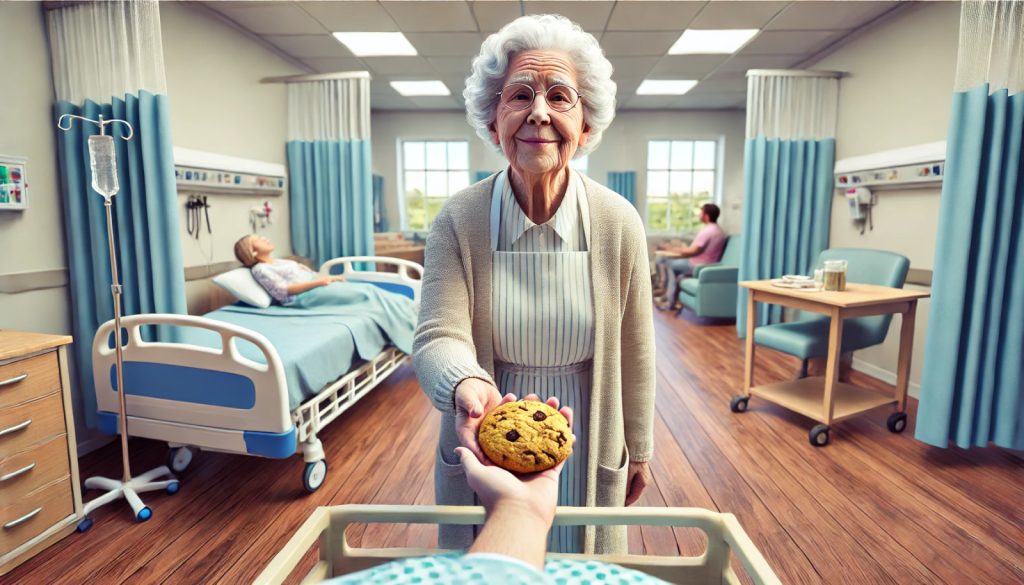


Marika néni csuda kedves, már az első nap körbejárta az egész pulmonológiát, hogy sütit osszon mindenkinek. Hatalmas szíve van! A nagy járkálás közepette viszont elhagyta a karszalagját, amin a páciens azonosítója is szerepelt. Segíts neki kideríteni az azonosítóját, különben nem engedik vissza a kórterembe!

Szerencsére hozzáférésed van:


*   a délelőtt készült mellkasi röntgen felvételekhez (*oitm_xrays*),
*   egy mellkasi röntgen alapján nemet (férfi/nő) azonosító hálóhoz (output: 0:férfi, 1:nő, lehet 0.5 a döntési küszöb) (*x_ray_gender_oitm.keras*)
*   és egy röntgen alapján szerveket szegmentáló hálóhoz. (labelek: 0:háttér, 1:szív, 2:test, 3:tüdő ) (*x_ray_organ_oitm.keras*)
* * Figyelj, mert ez a második háló **invertált röntgent vár**! (versenyen kívül:https://www.sciencedirect.com/science/article/abs/pii/S0735675717301973)

Ha megtalálod **melyik nőnek a legnagyobb a szíve**, kiderítheted Marika néni páciens azonosítóját is!

Válasznak add meg a röntgenfelvétel **fájlnevét, kiterjesztés nélkül!**

In [1]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
from keras.models import load_model

Csatolmánoyk letöltése és kitömörítése

In [2]:
! gdown 16U6joasvBULjqI9EOwz34MhsZ5s8fFg-

Downloading...
From (original): https://drive.google.com/uc?id=16U6joasvBULjqI9EOwz34MhsZ5s8fFg-
From (redirected): https://drive.google.com/uc?id=16U6joasvBULjqI9EOwz34MhsZ5s8fFg-&confirm=t&uuid=d89a28da-864a-4953-8d99-35683f16bd2f
To: /content/xray_oitm_data.zip
100% 33.3M/33.3M [00:00<00:00, 118MB/s] 


In [3]:
!unzip -q xray_oitm_data.zip

Adatok betöltése

In [4]:
BASE_DIR = 'xray_oitm_data/'
xray_dir = BASE_DIR + 'oitm_xrays/'
print("Délelőtti röntgenek száma:" , len(os.listdir(xray_dir)))

Délelőtti röntgenek száma: 93


In [5]:
# populate X_test
X_test = []
test_img_filenames=[]
for img in os.listdir(xray_dir):
    im = cv2.imread(os.path.join(xray_dir, img),0)
    X_test.append(im)
    test_img_filenames.append(img)
# convert to numpy array
X_test = np.array(X_test)
# normalize
X_test = np.expand_dims(X_test, axis=3)/255.

Predikciók

In [7]:
model = load_model('xray_oitm_data/x_ray_gender_oitm.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'Adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_gender_pred = model.predict(X_test)
y_female = y_gender_pred.flatten() > 0.5

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 881ms/step


In [ ]:
female_idxs = np.where(y_female)[0]
female_idxs

In [ ]:
X_test[female_idxs].shape

[ 0  1  2  3  4  6  9 11 12 13 14 15 18 24 28 30 31 32 37 41 42 44 46 47
 49 50 51 52 54 57 59 60 63 64 65 66 68 69 70 71 72 73 74 75 77 81 82 84
 86 92]


In [ ]:
model_organ = load_model('xray_oitm_data/x_ray_organ_model_oitm.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 66 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_organ_pred = model_organ.predict(1-(X_test[female_idxs]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 10s/step


In [ ]:
y_pred_argmax = np.argmax(y_organ_pred, axis=3)
y_pred_argmax.shape

In [ ]:
heart_areas = np.sum(y_pred_argmax==1,axis=(1,2))
heart_areas

(256, 256)


In [ ]:
marika_neni = np.argmax(heart_areas)
marika_neni

In [ ]:
heart_areas[marika_neni]

In [ ]:
female_idxs[marika_neni]

In [ ]:
test_img_filenames[female_idxs[marika_neni]]

Pálda plot a szegmentáló hálóhoz

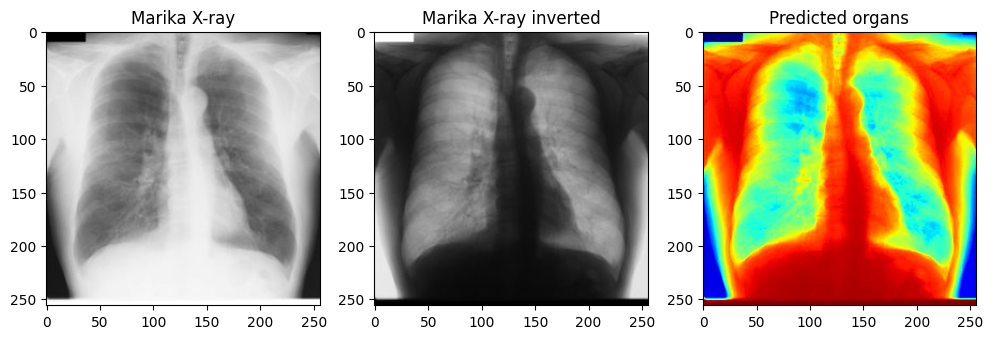

In [ ]:
i = marika_neni
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Marika X-ray')
plt.imshow(X_test[female_idxs[i]].squeeze(axis=2), cmap='gray')
plt.subplot(132)
plt.title('Marika X-ray inverted')
plt.imshow(1-(X_test[female_idxs[i]].squeeze(axis=2)), cmap='gray')
plt.subplot(133)
plt.title('Predicted organs')
plt.imshow(y_pred_argmax[i], cmap='jet')

plt.show()

In [ ]:
y_gender_pred.flatten()[female_idxs[marika_neni]]

JPCNN078.png
